## Adam (Adaptive Moment Estimation) 옵티마이저

Adam은 **모멘텀(Momentum)과 RMSprop의 핵심 아이디어를 결합**한 최적화 알고리즘이다. 모멘텀처럼 기울기의 평균(1차 모멘트)을 사용하여 이동 방향의 관성을 유지하고, RMSprop처럼 기울기의 분산(2차 모멘트)을 사용하여 각 파라미터의 학습률을 적응적으로 조절한다. 이 두 장점의 결합 덕분에 대부분의 딥러닝 문제에서 빠르고 안정적인 성능을 보여, 현재 가장 널리 사용되는 옵티마이저 중 하나이다.

### 1. 기본 설정
예시에 필요한 `numpy`와 시각화를 위한 `matplotlib` 라이브러리를 임포트.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. 예시 데이터 준비
이전 옵티마이저 예제들과의 비교를 위해, 동일한 선형 관계(`y = 2x + 1`)를 갖는 데이터를 생성.

In [2]:
# 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1) # y = 1 + 2x + noise

# 데이터 확인 (첫 5개)
print("X (입력) 샘플:\n", X[:5])
print("y (정답) 샘플:\n", y[:5])

X (입력) 샘플:
 [[1.27352302]
 [0.71140978]
 [0.03850007]
 [0.40911646]
 [1.35784957]]
y (정답) 샘플:
 [[4.91034265]
 [3.79708931]
 [2.30520311]
 [1.22252684]
 [2.88204929]]


### 3. Adam 구현 및 모델 학습

Adam 알고리즘을 단계별로 구현하여 모델의 최적 파라미터(`w`, `b`)를 찾아가는 과정.

1. `w`, `b`를 임의의 값으로 초기화하고, **1차 모멘트 변수 `m`, 2차 모멘트 변수 `v`를 0으로 초기화**.
2. 각 데이터 샘플에 대해 기울기를 계산.
3. **모멘트 업데이트**: `beta1`, `beta2` 감쇠율을 사용하여 `m`과 `v`를 업데이트.
   - `m = beta1 * m + (1 - beta1) * gradient` (Momentum 부분)
   - `v = beta2 * v + (1 - beta2) * (gradient**2)` (RMSprop 부분)
4. **편향 보정**: 학습 초기에 `m`, `v`가 0으로 편향되는 것을 막기 위해 보정.
   - `m_hat = m / (1 - beta1**t)`
   - `v_hat = v / (1 - beta2**t)` (여기서 `t`는 타임스텝)
5. **파라미터 업데이트**: 보정된 모멘트 값을 사용하여 파라미터를 업데이트.
   - `parameter = parameter - learning_rate * m_hat / (sqrt(v_hat) + epsilon)`

In [3]:
# 하이퍼파라미터 설정 (논문에서 제안된 기본값)
learning_rate = 0.01
n_epochs = 50
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# 모델 파라미터 초기화
w = np.random.randn(1, 1)
b = np.random.randn(1, 1)

# 모멘트 변수 초기화
m_w, v_w = np.zeros_like(w), np.zeros_like(w)
m_b, v_b = np.zeros_like(b), np.zeros_like(b)

m = len(X)
t = 0 # 타임스텝 초기화

print(f"초기 가중치 w: {w[0][0]:.4f}, 초기 편향 b: {b[0][0]:.4f}")

# 학습 과정 (SGD 기반)
for epoch in range(n_epochs):
    indices = np.random.permutation(m)
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    for i in range(m):
        t += 1 # 타임스텝 증가
        xi = X_shuffled[i:i+1]
        yi = y_shuffled[i:i+1]
        
        # 기울기 계산
        y_pred = np.dot(xi, w) + b
        error = y_pred - yi
        gradient_w = 2 * xi.T.dot(error)
        gradient_b = 2 * np.sum(error)
        
        # 1차, 2차 모멘트 업데이트
        m_w = beta1 * m_w + (1 - beta1) * gradient_w
        m_b = beta1 * m_b + (1 - beta1) * gradient_b
        v_w = beta2 * v_w + (1 - beta2) * (gradient_w ** 2)
        v_b = beta2 * v_b + (1 - beta2) * (gradient_b ** 2)
        
        # 편향 보정
        m_w_hat = m_w / (1 - beta1 ** t)
        m_b_hat = m_b / (1 - beta1 ** t)
        v_w_hat = v_w / (1 - beta2 ** t)
        v_b_hat = v_b / (1 - beta2 ** t)
        
        # 파라미터 업데이트
        w -= learning_rate * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
        b -= learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)
        
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:2d}: w = {w[0][0]:.4f}, b = {b[0][0]:.4f}")

초기 가중치 w: -0.2277, 초기 편향 b: -0.6530
Epoch 10: w = 1.8200, b = 1.2397
Epoch 20: w = 1.9292, b = 1.0092
Epoch 30: w = 2.0381, b = 0.9712
Epoch 40: w = 2.0230, b = 0.9135
Epoch 50: w = 2.0561, b = 0.9339


### 4. 학습 결과 확인

학습 완료 후의 최종 `w`와 `b`를 확인하여 실제 값(`w=2`, `b=1`)에 얼마나 근사하는지 비교.

In [4]:
print("===== 학습 완료 ====")
print(f"최종 가중치 w: {w[0][0]:.4f}")
print(f"최종 편향 b: {b[0][0]:.4f}")
print("실제 값: w=2, b=1")

===== 학습 완료 ====
최종 가중치 w: 2.0561
최종 편향 b: 0.9339
실제 값: w=2, b=1


### 5. 학습된 모델 시각화

원본 데이터(산점도)와 Adam을 통해 학습된 선형 회귀 직선을 함께 시각화하여 결과 확인.

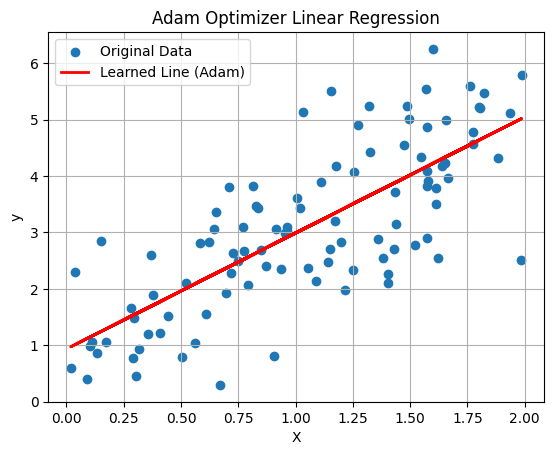

In [5]:
# 산점도로 원본 데이터 시각화
plt.scatter(X, y, label='Original Data')

# 학습된 선형 회귀선 시각화
y_pred_line = w * X + b
plt.plot(X, y_pred_line, color='red', linewidth=2, label='Learned Line (Adam)')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Adam Optimizer Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

### 6. 결론 및 요약

- **핵심 특징**: 모멘텀의 '관성'과 RMSprop의 '적응적 학습률'이라는 두 가지 강력한 메커니즘을 효과적으로 결합.
- **장점**: 일반적으로 하이퍼파라미터(beta1, beta2, epsilon)의 기본값이 대부분의 문제에서 잘 작동하여 사용하기 매우 편리. 빠르고 안정적인 수렴 성능을 보임.
- **현실적 위치**: 복잡한 딥러닝 모델을 훈련할 때 가장 먼저 고려되는 '기본(default)' 옵티마이저로 널리 인정받고 있음.
- **관련 연구**: Adam의 성능을 일부 데이터셋에서 더욱 개선하기 위한 AdamW, NAdam 등의 변형 알고리즘들이 연구되었음.

### 한 문장 요약

Adam은 모멘텀의 관성 효과와 RMSprop의 적응적 학습률을 결합하여 빠르고 안정적으로 최적점을 찾는 매우 효율적인 최적화 알고리즘이다.